In [1]:
import numpy as np
import pickle
import lzma

import elephant.statistics as estats
import elephant
import neo
from quantities import ms, s, Hz

from elephant.spike_train_dissimilarity import victor_purpura_distance
from elephant.spike_train_dissimilarity import van_rossum_distance

import pandas as pd
import matplotlib.pyplot as plt

import multiprocessing



In [2]:

def get_vpdist(networktype, layercount, meandelay, stddelay, model_id, input_idx, n_run, CellType = "point"):
    name = networktype + '_' + str(CellType) + '_layercount' + str(layercount) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stddelay) + '_meandelay' + str(meandelay) + '_nrun' + str(n_run)
    with lzma.open("./VP_every/" + name + "_vp.xz", "rb") as fp:
          outsaved = pickle.load(fp)
    return outsaved
        
def get_vrdist(networktype, layercount, meandelay, stddelay, model_id, input_idx, n_run, CellType = "point"):
    name = networktype + '_' + str(CellType) + '_layercount' + str(layercount) + '_model' + str(model_id) + '_input' + str(input_idx) + '_stddelay' + str(stddelay) + '_meandelay' + str(meandelay) + '_nrun' + str(n_run)
    with lzma.open("./VR_every/" + name + "_vr.xz", "rb") as fp:
          outsaved = pickle.load(fp)
    return outsaved


In [3]:
!pwd

/vast/palmer/scratch/mcdougal/rh882/NetworkErrorLarge


In [4]:
# networktype = 'FeedForward'
# CellType = 'point'
# # get_vpdist(networktype, 60, 3.0, 0.2, 0, 0, 0, CellType)

# outsaved = pd.DataFrame(get_vpdist(networktype, 60, 3.0, 0.2, 0, 0, 0, CellType))

# outsaved.columns = ['avgVP', 'SpikeCountatBase', 'Layer#']
# outsaved['avgVP'] = outsaved['avgVP'].astype('float64')
# outsaved['SpikeCountatBase'] = outsaved['SpikeCountatBase'].astype('int')
# outsaved['Layer#'] = outsaved['Layer#'].astype('int')

# outsaved['layercount'] = layercount
# outsaved['stddelay'] = stddelay
# outsaved['MeanDelay'] = MeanDelay
# outsaved['modelid'] = modelid
# outsaved['inputid'] = inputid
# outsaved['nrun'] = nrun
# outsaved

In [5]:
networktype = 'FeedForward'
CellType = 'point'

std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.05):
    stdDelay = np.round(stdDelay_noround,2)
    std_delay_lst.append(stdDelay)

mean_delay_lst = []
for MeanDelay_noround in np.arange(3, 3.01, 0.2):
    MeanDelay = np.round(MeanDelay_noround,1)
    mean_delay_lst.append(MeanDelay)

counter = 0
alloutsaved = []
# for layercount in [30, 40, 50, 60]:
for layercount in [200]:
    for MeanDelay in mean_delay_lst:
        for stddelay in std_delay_lst:
            for modelid in range(10):
                for inputid in range(10):
                    for nrun in range(10):    
                        outsaved = pd.DataFrame(get_vpdist(networktype, layercount, MeanDelay, stddelay, modelid, inputid, nrun, CellType))
                        outsaved.columns = ['avgVP', 'SpikeCountatBase', 'Layer#']
                        outsaved['avgVP'] = outsaved['avgVP'].astype('float64')
                        outsaved['SpikeCountatBase'] = outsaved['SpikeCountatBase'].astype('int')
                        outsaved['Layer#'] = outsaved['Layer#'].astype('int')
                        outsaved['layercount'] = layercount
                        outsaved['stddelay'] = stddelay
                        outsaved['MeanDelay'] = MeanDelay
                        outsaved['modelid'] = modelid
                        outsaved['inputid'] = inputid
                        outsaved['nrun'] = nrun
                        alloutsaved.append(outsaved)
                        if counter % 1000 == 0 :
                            print(counter)
                        counter += 1

combined_df = pd.concat(alloutsaved, axis=0, ignore_index=True)

with lzma.open("./aggData/VPofEveryCellEveryRun.xz", "wb") as fp:
    pickle.dump(combined_df, fp)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
11000
12000
13000
14000
15000
16000
17000
18000
19000
20000


In [6]:
networktype = 'FeedForward'
CellType = 'point'

std_delay_lst = []
for stdDelay_noround in np.arange(0.0, 1.01, 0.1):
    stdDelay = np.round(stdDelay_noround,2)
    std_delay_lst.append(stdDelay)

mean_delay_lst = []
for MeanDelay_noround in np.arange(3, 3.01, 0.2):
    MeanDelay = np.round(MeanDelay_noround,1)
    mean_delay_lst.append(MeanDelay)

counter = 0
alloutsaved = []
# for layercount in [30, 40, 50, 60]:
for layercount in [200]:
    for MeanDelay in mean_delay_lst:
        for stddelay in std_delay_lst:
            for modelid in range(10):
                for inputid in range(10):
                    for nrun in range(10):    
                        outsaved = pd.DataFrame(get_vrdist(networktype, layercount, MeanDelay, stddelay, modelid, inputid, nrun, CellType))
                        outsaved.columns = {'avgVR', 'SpikeCountatBase', 'Layer#'}
                        outsaved['avgVR'] = outsaved['avgVR'].astype('float64')
                        outsaved['SpikeCountatBase'] = outsaved['SpikeCountatBase'].astype('int')
                        outsaved['Layer#'] = outsaved['Layer#'].astype('int')
                        outsaved['layercount'] = layercount
                        outsaved['stddelay'] = stddelay
                        outsaved['MeanDelay'] = MeanDelay
                        outsaved['modelid'] = modelid
                        outsaved['inputid'] = inputid
                        outsaved['nrun'] = nrun
                        alloutsaved.append(outsaved)
                        if counter % 1000 == 0 :
                            print(counter)
                        counter += 1
                        
combined_df = pd.concat(alloutsaved, axis=0, ignore_index=True)

with lzma.open("./aggData/VRofEveryCellEveryRun.xz", "wb") as fp:
    pickle.dump(combined_df, fp)

0
1000
2000
3000
4000
5000
6000
7000
8000
9000
10000


In [11]:
# networktype = 'FeedForward'
# CellType = 'point'
# get_vpdist(networktype, 60, 2.8, 0.8, 5, 5, 5, CellType)

In [12]:
# with lzma.open("./VPofEveryCellEveryRun.xz", "rb") as fp:
#     combined_df = pickle.load(fp)

In [13]:
# np.sort(combined_df['avgVP'])

In [14]:
# grouped_df = combined_df.groupby(['layercount', 'MeanDelay', 'Layer#','stddelay']).mean()['avgVP']
# grouped_df = grouped_df.reset_index()
# grouped_df = grouped_df.rename(columns={
#     'layercount': 'LayerCount',
#     'MeanDelay': 'MeanDelay',  # This renaming is redundant but included for clarity
#     'stddelay': 'StdDelay',
#     'Layer#': 'NthLayer',
#     'avgVP': 'VP'  # Renaming the aggregated column to 'VP'
# })

In [15]:
# df = grouped_df
# df.loc[(df['LayerCount'] == 30) & (df['MeanDelay'] == 3.0) & (df['NthLayer'] == 2)&(df['StdDelay'] > 0.04), :].sort_values(by ='StdDelay')

In [16]:
# df = grouped_df
# std_delay_lst = []
# for stdDelay_noround in np.arange(0.05, 1.01, 0.05):
#         stdDelay = np.round(stdDelay_noround,2)
#         std_delay_lst.append(stdDelay)

# # for cost = 0/ms but missing is 1
# fig, axs = plt.subplots(1, 6, figsize=(40, 20))
# counter_i = -1
# for layercount in [30]: #, 40, 50, 60
#     counter_i += 1 
#     counter_j = -1
#     for MeanDelay_noround in np.arange(2, 3.01, 0.2):
#         MeanDelay = np.round(MeanDelay_noround,1)
#         counter_j += 1
#         for nlayer in np.arange(0, 10):
#             # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), 'VP'].values[0]
            
#             tempdf = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer)&(df['StdDelay'] > 0.04), :].sort_values(by ='StdDelay')
#             y = tempdf['VP']
#             std_delay_= tempdf['StdDelay']
#             axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlayer) + ' layers')
#             axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(layercount, MeanDelay))
#             axs[counter_i, counter_j].legend()

In [1]:
!pwd

/vast/palmer/scratch/mcdougal/rh882/NetworkError


TypeError: 'Axes' object is not subscriptable

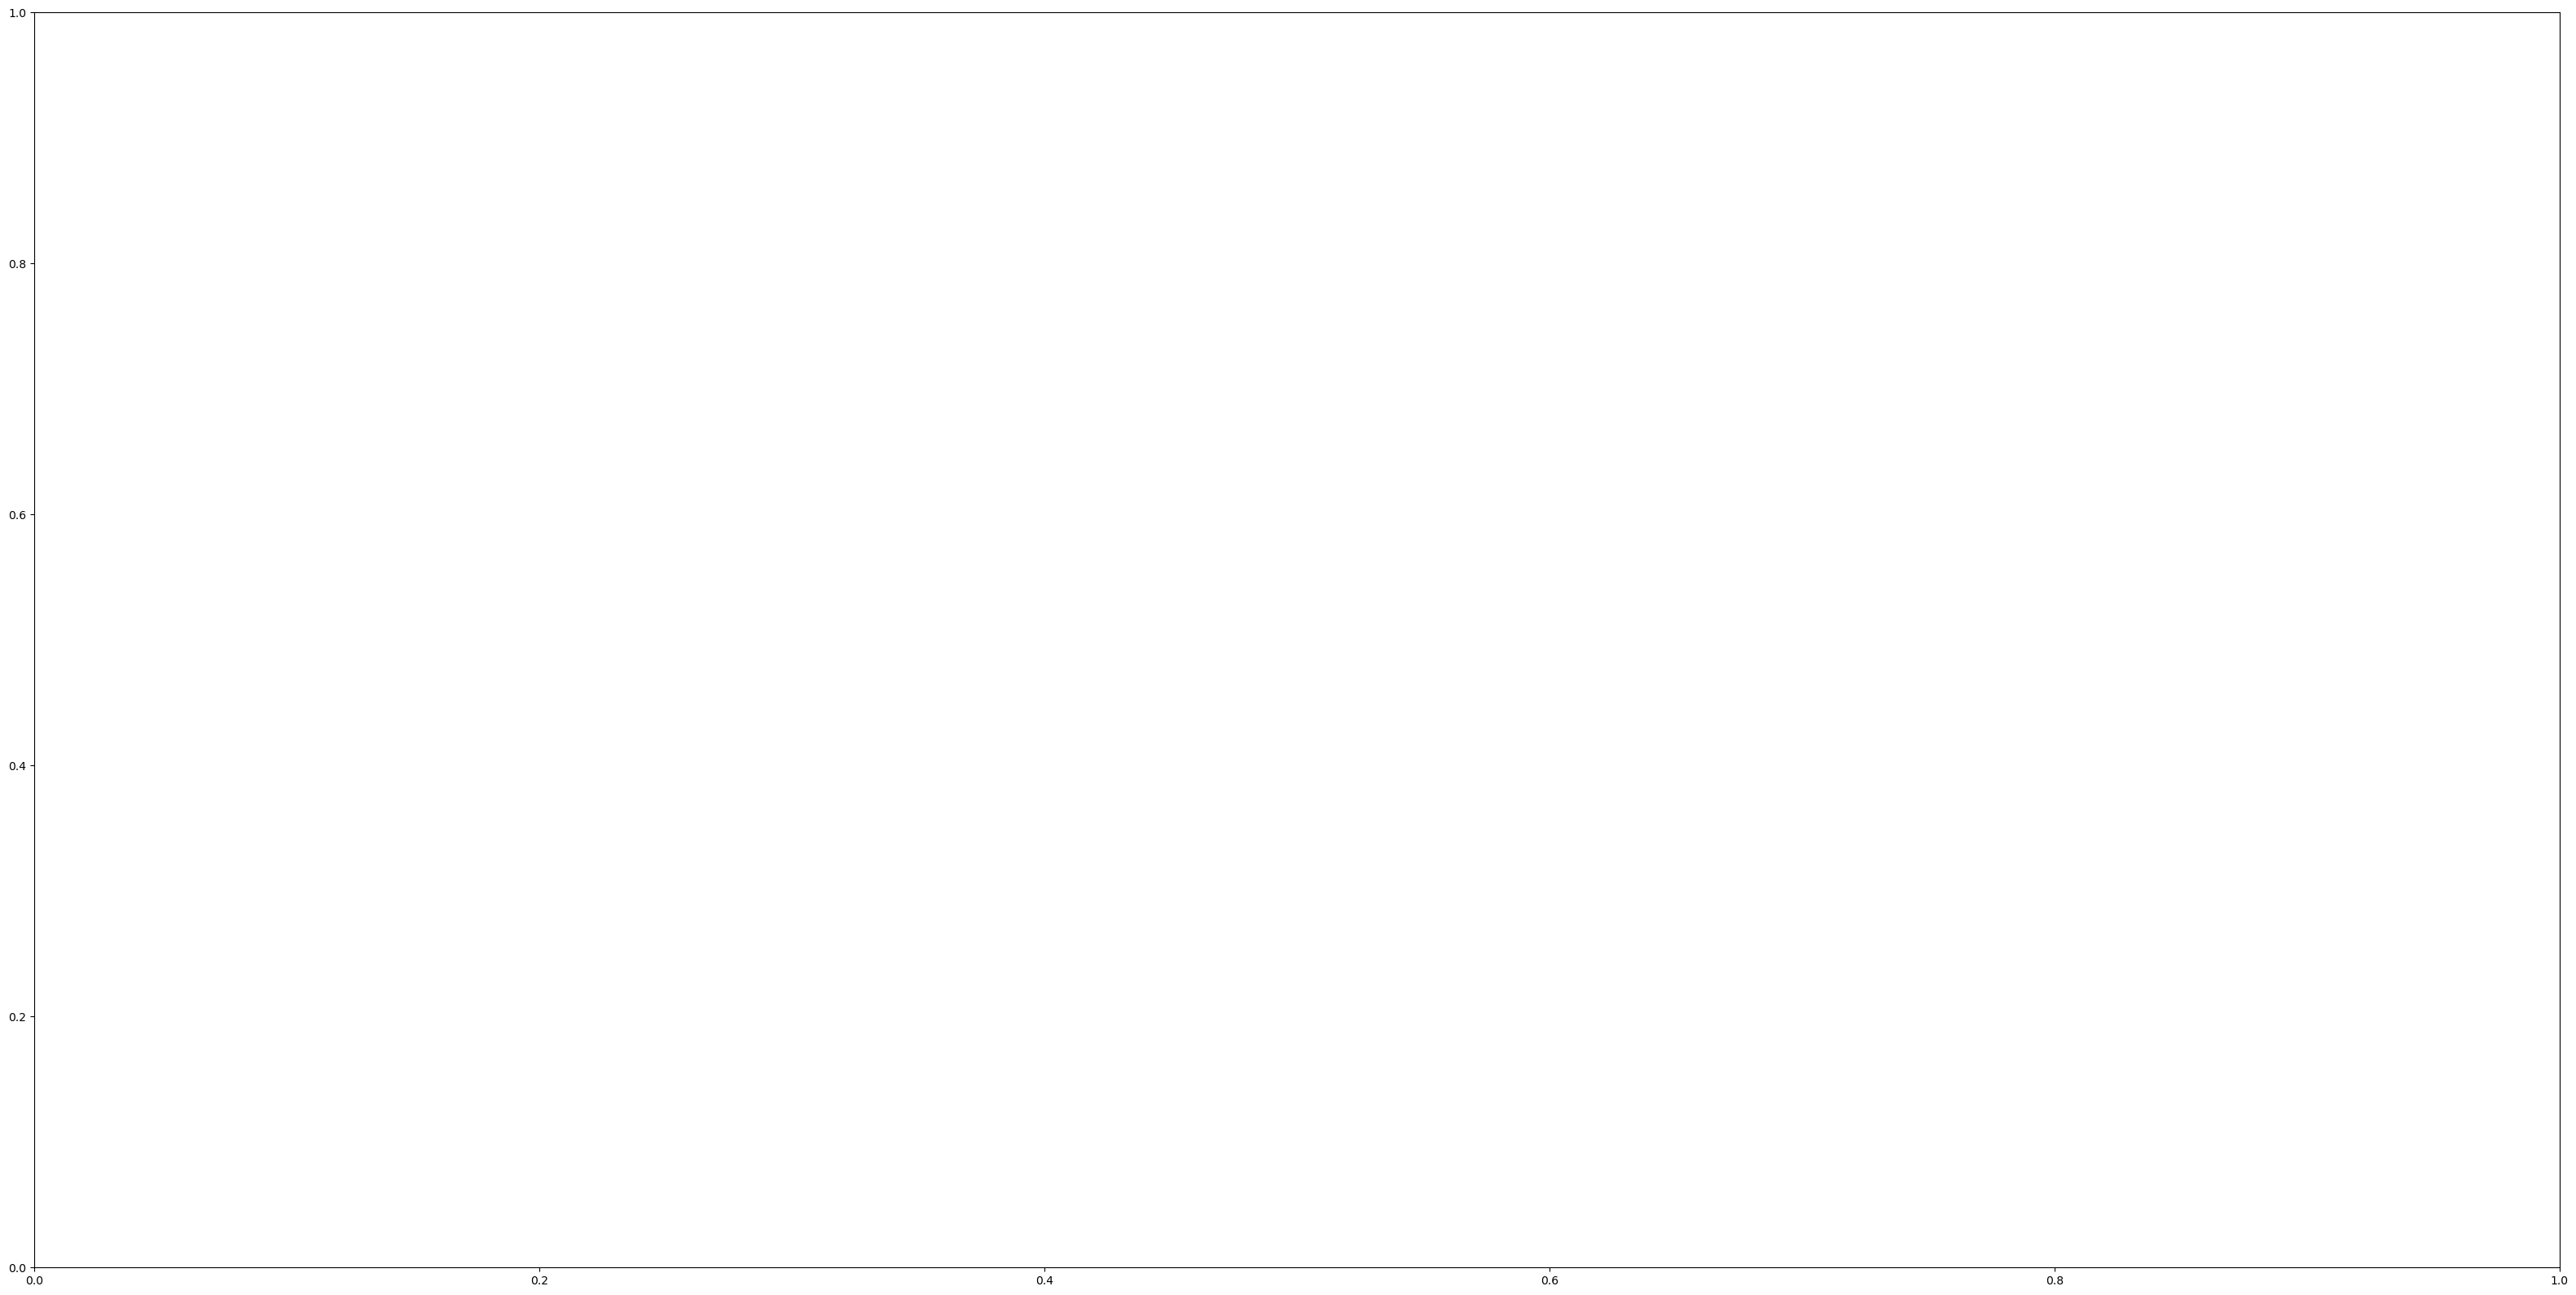

In [8]:

std_delay_lst = []
for stdDelay_noround in np.arange(0.00, 1.01, 0.05):
        stdDelay = np.round(stdDelay_noround,2)
        std_delay_lst.append(stdDelay)

# for cost = 0/ms but missing is 1
fig, axs = plt.subplots(1, 1, figsize=(40, 20))
counter_i = -1
for layercount in [200]: #
    with lzma.open("./aggData/VPofEveryCellEveryRun.xz", "rb") as fp:
        combined_df = pickle.load(fp)
    grouped_df = combined_df.groupby(['layercount', 'MeanDelay', 'Layer#','stddelay']).mean()['avgVP']
    grouped_df = grouped_df.reset_index()
    grouped_df = grouped_df.rename(columns={
        'layercount': 'LayerCount',
        'MeanDelay': 'MeanDelay',  # This renaming is redundant but included for clarity
        'stddelay': 'StdDelay',
        'Layer#': 'NthLayer',
        'avgVP': 'VP'  # Renaming the aggregated column to 'VP'
    })
    df = grouped_df
    counter_i += 1 
    counter_j = -1
    for MeanDelay_noround in np.arange(2, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround,1)
        counter_j += 1
        for nlayer in np.arange(0, 10):
            # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), 'VP'].values[0]
            
            tempdf = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer)&(df['StdDelay'] > 0.04), :].sort_values(by ='StdDelay')
            y = tempdf['VP']
            y = pd.concat([pd.Series([0.0]), y])
            std_delay_= tempdf['StdDelay']
            axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlayer) + ' layers')
            axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(layercount, MeanDelay))
            axs[counter_i, counter_j].legend()
plt.savefig('example2.png')

In [18]:
# with lzma.open("./VRofEveryCellEveryRun.xz", "rb") as fp:
#     combined_df = pickle.load(fp)

In [19]:
# grouped_df = combined_df.groupby(['layercount', 'MeanDelay', 'stddelay', 'Layer#']).mean()['avgVR']
# grouped_df = grouped_df.reset_index()
# grouped_df = grouped_df.rename(columns={
#     'layercount': 'LayerCount',
#     'MeanDelay': 'MeanDelay',  # This renaming is redundant but included for clarity
#     'stddelay': 'StdDelay',
#     'Layer#': 'NthLayer',
#     'avgVR': 'VR'  # Renaming the aggregated column to 'VP'
# })

In [9]:

# std_delay_lst = []
# for stdDelay_noround in np.arange(0.0, 1.01, 0.05 ):
#         stdDelay = np.round(stdDelay_noround,2)
#         std_delay_lst.append(stdDelay)

# # for cost = 0/ms but missing is 1
# fig, axs = plt.subplots(3, 6, figsize=(40, 20))
# counter_i = -1
# for layercount in [30, 50, 60]:
#     with lzma.open("./VRofEveryCellEveryRun"+str(layercount)+".xz", "rb") as fp:
#         combined_df = pickle.load(fp)
#     grouped_df = combined_df.groupby(['layercount', 'MeanDelay', 'stddelay', 'Layer#']).mean()['avgVR']
#     grouped_df = grouped_df.reset_index()
#     grouped_df = grouped_df.rename(columns={
#         'layercount': 'LayerCount',
#         'MeanDelay': 'MeanDelay',  # This renaming is redundant but included for clarity
#         'stddelay': 'StdDelay',
#         'Layer#': 'NthLayer',
#         'avgVR': 'VR'  # Renaming the aggregated column to 'VP'
#     })
#     df = grouped_df
#     counter_i += 1 
#     counter_j = -1
#     for MeanDelay_noround in np.arange(2, 3.01, 0.2):
#         MeanDelay = np.round(MeanDelay_noround,1)
#         counter_j += 1
#         for nlayer in np.arange(0, 10):
#             # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), 'VP'].values[0]
#             tempdf = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer)&(df['StdDelay'] > 0.04), :].sort_values(by ='StdDelay')
#             y = tempdf['VR']
#             y = pd.concat([pd.Series([0.0]), y])
            
#             # y = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer), :].sort_values(by ='StdDelay')['VR']
#             axs[counter_i, counter_j].plot(std_delay_lst, y,  label=str(nlayer) + ' layers')
#             axs[counter_i, counter_j].set_title('{} cells/layer,MeanDelay {}'.format(layercount, MeanDelay))
#             axs[counter_i, counter_j].legend()

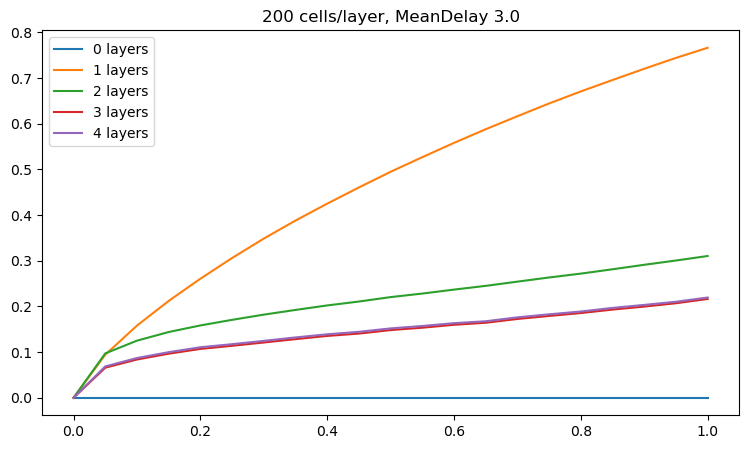

In [5]:
std_delay_lst = []
for stdDelay_noround in np.arange(0.00, 1.01, 0.05):
    stdDelay = np.round(stdDelay_noround, 2)
    std_delay_lst.append(stdDelay)

fig, axs = plt.subplots(1, 1, figsize=(9, 5))  # Assuming one subplot for simplicity
counter_i = 0
for layercount in [200]:
    with lzma.open("./aggData/VPofEveryCellEveryRun.xz", "rb") as fp:
        combined_df = pickle.load(fp)
    grouped_df = combined_df.groupby(['layercount', 'MeanDelay', 'Layer#', 'stddelay']).mean()['avgVP']
    df = grouped_df.reset_index().rename(columns={
        'layercount': 'LayerCount',
        'MeanDelay': 'MeanDelay',
        'stddelay': 'StdDelay',
        'Layer#': 'NthLayer',
        'avgVP': 'VP'
    })
    for MeanDelay_noround in np.arange(3, 3.01, 0.2):
        MeanDelay = np.round(MeanDelay_noround, 1)
        for nlayer in range(5):
            tempdf = df.loc[(df['LayerCount'] == layercount) & (df['MeanDelay'] == MeanDelay) & (df['NthLayer'] == nlayer) & (df['StdDelay'] > 0.04)].sort_values(by='StdDelay')
            y = pd.concat([pd.Series([0.0]), tempdf['VP']])
            std_delay_ = pd.concat([pd.Series([0.0]), tempdf['StdDelay']])
            axs.plot(std_delay_, y, label=f'{nlayer} layers')
            axs.set_title(f'{layercount} cells/layer, MeanDelay {MeanDelay}')
            axs.legend()

plt.savefig('example2.png')
